In [2]:
from scipy.integrate import odeint
import numpy as np
import sympy
from sympy import *
%matplotlib inline
%config InlineBackend.figure_format = 'png'
def calculate_event(z,t):
    RNA,RNAP,ATPtot,UTPtot,GTPtot,CTPtot,PPitot = z[0], z[1], z[2], z[3], z[4], z[5],z[6]
    
    #Mgf,MgNTP,Mg2NTP,MgHNTP,MgPPi,Mg2PPi,MgHPPi,NTPf,HNTP,PPif,HPPi,H2PPi,Hf
    if t == 0:
        global solved
        solved = fsolve(values,[10,100,3,10,5,10,10,1,10,1,10,1,10,1,1],args=(CTPtot,PPitot))
    else:
        solved = fsolve(values,solved,args=(CTPtot,PPitot))
        print(solved)
    
    MgNTP = solved[1]
    Mgf = solved[0]
    NATP = 27
    NUTP = 26
    NGTP = 28
    NCTP = 32
    Nall = NATP + NGTP + NUTP + NCTP
    kapp = 2.04
    kd = -0.014
    K1 = 0.23E3
    K2 = 0.094E3
    
    V = kapp * RNAP * (MgNTP /(MgNTP + K1))* (Mgf / (Mgf + K2))
    
    dRNAdt = V - 0.0077*RNA
    dRNAPdt = kd*RNAP
    dATPtotdt = - NATP * V
    dUTPtotdt = - NUTP * V
    dGTPtotdt = - NGTP * V
    dCTPtotdt = - NCTP * V
    dPPitotdt = (Nall - 1) * V/ Nall
    return [dRNAdt,dRNAPdt,dATPtotdt,dUTPtotdt,dGTPtotdt,dCTPtotdt,dPPitotdt]

In [3]:
from scipy.optimize import fsolve
def values(y,param0,param1):
    
    CTPtot = param0
    PPitot = param1
    
    Mgf,MgNTP,Mg2NTP,MgHNTP,MgPPi,Mg2PPi,MgHPPi,NTPf,HNTP,PPif,HPPi,H2PPi,Hf,Trisf,Tris = y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14]
    
    KHNTP = 1.12E-1
    KMgNTP = 3.80E1
    KMg2NTP = 2.04E4
    KMgHNTP = 3.24E4
    KHPPi = 1.148E-3
    KMgPPi = 3.80
    KMg2PPi = 4.68E3
    KH2PPi = 7.41E-1
    KMgHPPi = 8.91E2
    KTris = 7.94E-3
    Mgtot = 6.0E3
    NTPtot = CTPtot
    Htot = 40.0E3
    Tristot = 40.0E3
    
    return [
         Mgf + MgNTP + 2 * Mg2NTP + MgHNTP + MgPPi + 2 * Mg2PPi + MgHPPi - Mgtot,
         NTPf + HNTP + MgNTP + Mg2NTP + MgHNTP - NTPtot,
         PPif + HPPi + MgPPi + Mg2PPi + H2PPi + MgHPPi - PPitot,
         Hf + HNTP + MgHNTP + HPPi + 2 * H2PPi + MgHPPi + Tris  - Htot,
         Trisf + Tris - Tristot,
         HNTP -  (Hf * NTPf) / KHNTP,
         MgNTP - (Mgf * NTPf) / KMgNTP,
         Mg2NTP - (Mgf * MgNTP) / KMg2NTP,
         MgHNTP - (Mgf * HNTP) / KMgHNTP,
         HPPi - (Hf * PPif) / KHPPi,
         MgPPi - (Mgf * PPif) / KMgPPi,
         Mg2PPi - (Mgf * MgPPi) / KMg2PPi,
         H2PPi - (Hf * HPPi) / KH2PPi,
         MgHPPi - (Mgf * HPPi) / KMgHPPi,
         Tris - (Hf * Trisf) / KTris
    ]
   

In [4]:
initial_values = [
    0,
    0.817,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]

In [5]:
t = np.linspace(0,140, 1000)

In [6]:
value = odeint(calculate_event,initial_values,t)

[3.67264958e+03 1.69370094e+03 3.04920100e+02 2.38092693e+01
 2.31586195e-06 1.81727037e-06 1.14437745e-05 1.75243062e+01
 2.10044631e+02 2.39634222e-09 2.77627671e-06 5.04197381e-06
 1.34242112e+00 2.35196346e+02 3.97648037e+04]
[3.67264959e+03 1.69370093e+03 3.04920099e+02 2.38092692e+01
 2.33931145e-06 1.83578446e-06 1.16665065e-05 1.75243060e+01
 2.10044630e+02 2.42042790e-09 2.83034280e-06 5.12754651e-06
 1.34242112e+00 2.35196345e+02 3.97648037e+04]
[3.67264903e+03 1.69370142e+03 3.04920140e+02 2.38092720e+01
 5.17939681e-07 4.06455270e-07 2.58304452e-06 1.75243138e+01
 2.10044687e+02 5.35899503e-10 6.26657394e-07 1.13527392e-06
 1.34242089e+00 2.35196385e+02 3.97648036e+04]
[3.67264903e+03 1.69370141e+03 3.04920140e+02 2.38092720e+01
 5.26890867e-07 4.13479750e-07 2.62768546e-06 1.75243137e+01
 2.10044686e+02 5.45161076e-10 6.37487473e-07 1.15489406e-06
 1.34242089e+00 2.35196385e+02 3.97648036e+04]
[3.67264890e+03 1.69370153e+03 3.04920150e+02 2.38092726e+01
 1.03587940e-07 8.1

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


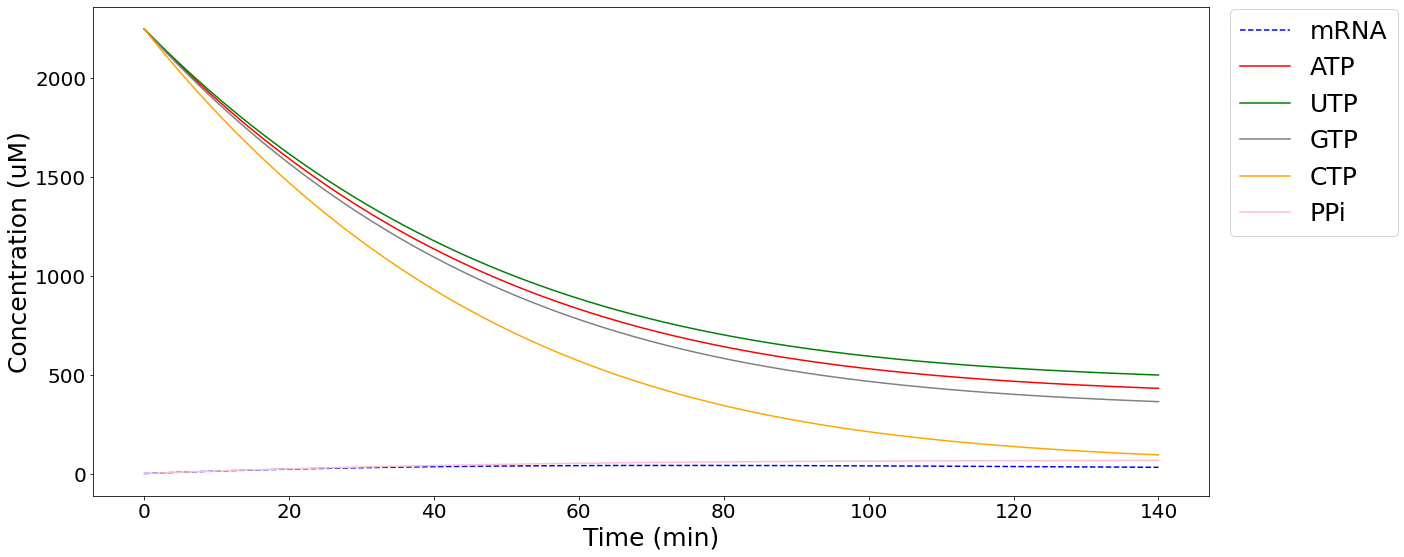

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(t,value[:,0],'b--', label ='mRNA')
plt.plot(t,value[:,2],'red', label ='ATP')
plt.plot(t,value[:,3],'green', label ='UTP')
plt.plot(t,value[:,4],'grey', label ='GTP')
plt.plot(t,value[:,5],'orange', label ='CTP')
plt.plot(t,value[:,6],'pink', label ='PPi')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Concentration (uM)', size=25)
plt.xlabel('Time (min)', size=25)
plt.legend(prop={'size':25}, bbox_to_anchor=(1.18, 1.02))

In [134]:
from matplotlib.font_manager import FontProperties
text = FontProperties(fname=r"\G:\HarmonyOS_Sans_Medium.ttf")

<ipython-input-172-00c7a65d2506>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fig.suptitle('Concentration of different material in mRNA transcription system',y=0.915, FontProperties=text,fontsize=23,color ='#006699')
<ipython-input-172-00c7a65d2506>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[0, 0].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
<ipython-input-172-00c7a65d2506>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[0, 0].set_ylabel('mRNA Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
<ipython-input-172-00c7a65d2506>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor re

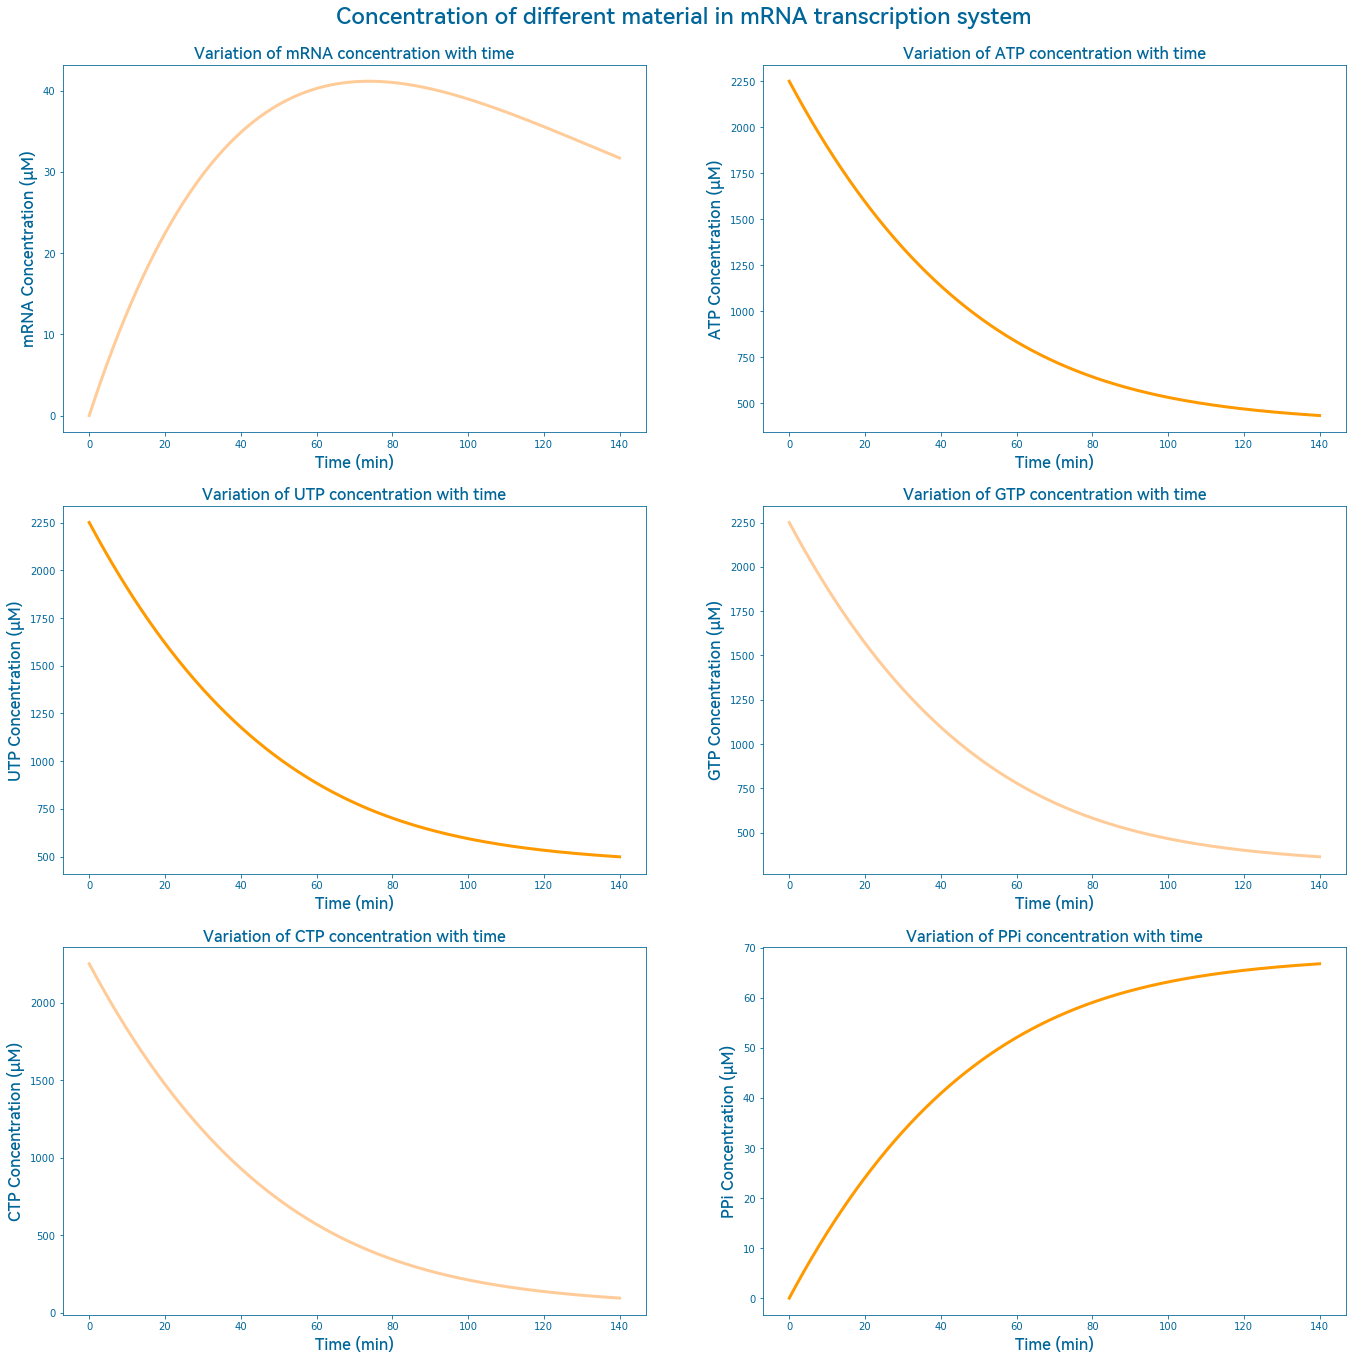

In [172]:
fig, axs = plt.subplots(3, 2, figsize=(23,23))
font = {'weight' : 'normal',
'size' : 18,
'color' : '#006699',
}
fig.suptitle('Concentration of different material in mRNA transcription system',y=0.915, FontProperties=text,fontsize=23,color ='#006699')
axs[0, 0].plot(t, value[:,0], '#FFCC99',linewidth=3)
axs[0, 0].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[0, 0].set_ylabel('mRNA Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[0, 0].set_title ('Variation of mRNA concentration with time',font,FontProperties=text,fontsize = 16)
axs[0, 0].tick_params(axis='both', colors = '#006699')
axs[0, 0].spines['right'].set_color('#006699')
axs[0, 0].spines['left'].set_color('#006699')
axs[0, 0].spines['top'].set_color('#006699')
axs[0, 0].spines['bottom'].set_color('#006699')
axs[0, 0].ticklabel_format(useOffset=False)

axs[0, 1].plot(t, value[:,2], '#FF9900',linewidth=3)
axs[0, 1].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[0, 1].set_ylabel('ATP Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[0, 1].set_title ('Variation of ATP concentration with time',font,FontProperties=text,fontsize = 16)
axs[0, 1].tick_params(axis='both', colors = '#006699')
axs[0, 1].spines['right'].set_color('#006699')
axs[0, 1].spines['left'].set_color('#006699')
axs[0, 1].spines['top'].set_color('#006699')
axs[0, 1].spines['bottom'].set_color('#006699')
axs[0, 1].ticklabel_format(useOffset=False)

axs[1, 0].plot(t, value[:,3],'#FF9900',linewidth=3)
axs[1, 0].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[1, 0].set_ylabel('UTP Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[1, 0].set_title ('Variation of UTP concentration with time',font,FontProperties=text,fontsize = 16)
axs[1, 0].tick_params(axis='both', colors = '#006699')
axs[1, 0].spines['right'].set_color('#006699')
axs[1, 0].spines['left'].set_color('#006699')
axs[1, 0].spines['top'].set_color('#006699')
axs[1, 0].spines['bottom'].set_color('#006699')
axs[1, 0].ticklabel_format(useOffset=False)

axs[1, 1].plot(t, value[:,4], '#FFCC99',linewidth=3)
axs[1, 1].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[1, 1].set_ylabel('GTP Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[1, 1].set_title ('Variation of GTP concentration with time',font,FontProperties=text,fontsize = 16)
axs[1, 1].tick_params(axis='both', colors = '#006699')
axs[1, 1].spines['right'].set_color('#006699')
axs[1, 1].spines['left'].set_color('#006699')
axs[1, 1].spines['top'].set_color('#006699')
axs[1, 1].spines['bottom'].set_color('#006699')
axs[1, 1].ticklabel_format(useOffset=False)

axs[2, 0].plot(t, value[:,5], '#FFCC99',linewidth=3)
axs[2, 0].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[2, 0].set_ylabel('CTP Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[2, 0].set_title ('Variation of CTP concentration with time',font,FontProperties=text,fontsize = 16)
axs[2, 0].tick_params(axis='both', colors = '#006699')
axs[2, 0].spines['right'].set_color('#006699')
axs[2, 0].spines['left'].set_color('#006699')
axs[2, 0].spines['top'].set_color('#006699')
axs[2, 0].spines['bottom'].set_color('#006699')
axs[2, 0].ticklabel_format(useOffset=False)

axs[2, 1].plot(t, value[:,6], '#FF9900',linewidth=3)
axs[2, 1].set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[2, 1].set_ylabel('PPi Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 16)
axs[2, 1].set_title ('Variation of PPi concentration with time',font,FontProperties=text,fontsize = 16)
axs[2, 1].tick_params(axis='both', colors = '#006699')
axs[2, 1].spines['right'].set_color('#006699')
axs[2, 1].spines['left'].set_color('#006699')
axs[2, 1].spines['top'].set_color('#006699')
axs[2, 1].spines['bottom'].set_color('#006699')
axs[2, 1].ticklabel_format(useOffset=False)
plt.savefig("fig1.png",dpi=500, bbox_inches='tight')

In [180]:
initial_values_event1 = [
    0,
    0.87,
    1.00E3,
    1.00E3,
    1.00E3,
    1.00E3,
    0.0E3,
]
value1 = odeint(calculate_event,initial_values_event1,t)

initial_values_event2 = [
    0,
    0.87,
    1.50E3,
    1.50E3,
    1.50E3,
    1.50E3,
    0.0E3,
]
value2 = odeint(calculate_event,initial_values_event2,t)

initial_values_event3 = [
    0,
    0.87,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]
value3 = odeint(calculate_event,initial_values_event3,t)

initial_values_event4 = [
    0,
    0.87,
    3.00E3,
    3.00E3,
    3.00E3,
    3.00E3,
    0.0E3,
]
value4 = odeint(calculate_event,initial_values_event4,t)

initial_values_event5 = [
    0,
    0.87,
    3.75E3,
    3.75E3,
    3.75E3,
    3.75E3,
    0.0E3,
]
value5 = odeint(calculate_event,initial_values_event5,t)

[4.94999907e+03 6.95270466e+02 1.68705302e+02 1.73198412e+01
 1.24061024e-06 1.31218366e-06 1.09639975e-05 5.33743084e+00
 1.13366255e+02 9.52387837e-10 1.97351991e-06 6.33567463e-06
 2.37886371e+00 1.33064985e+02 3.98669350e+04]
[4.94999907e+03 6.95270466e+02 1.68705302e+02 1.73198412e+01
 1.24060972e-06 1.31218311e-06 1.09639929e-05 5.33743084e+00
 1.13366255e+02 9.52387436e-10 1.97351908e-06 6.33567196e-06
 2.37886371e+00 1.33064985e+02 3.98669350e+04]
[4.94999980e+03 6.95269941e+02 1.68705199e+02 1.73198340e+01
 2.48121857e-06 2.62436569e-06 2.19279855e-05 5.33742603e+00
 1.13366191e+02 1.90477393e-09 3.94703754e-06 1.26713462e-05
 2.37886451e+00 1.33064940e+02 3.98669351e+04]
[4.94999980e+03 6.95269941e+02 1.68705199e+02 1.73198340e+01
 2.48121805e-06 2.62436513e-06 2.19279808e-05 5.33742603e+00
 1.13366191e+02 1.90477353e-09 3.94703671e-06 1.26713435e-05
 2.37886451e+00 1.33064940e+02 3.98669351e+04]
[4.95114457e+03 6.94438659e+02 1.68542460e+02 1.73083762e+01
 1.96307272e-03 2.0

 2.05404884e+00 1.54026052e+02 3.98459739e+04]
[5.07957545e+03 5.84584135e+02 1.45560746e+02 1.30800053e+01
 2.84813713e+00 3.09130928e+00 2.26081606e+01 4.37323894e+00
 8.34306282e+01 2.13067434e-03 3.96566038e+00 1.14350388e+01
 2.13668416e+00 1.48091216e+02 3.98519088e+04]
[5.07957549e+03 5.84584107e+02 1.45560740e+02 1.30800048e+01
 2.84813716e+00 3.09130934e+00 2.26081612e+01 4.37323869e+00
 8.34306248e+01 2.13067435e-03 3.96566046e+00 1.14350392e+01
 2.13668419e+00 1.48091214e+02 3.98519088e+04]
[5.17389893e+03 5.17922875e+02 1.31356893e+02 1.20341005e+01
 2.91860854e+00 3.22662086e+00 2.40584605e+01 3.80391452e+00
 7.53599679e+01 2.14358893e-03 4.14312080e+00 1.24061597e+01
 2.21885018e+00 1.42626819e+02 3.98573732e+04]
[5.17389893e+03 5.17922871e+02 1.31356892e+02 1.20341005e+01
 2.91860855e+00 3.22662087e+00 2.40584605e+01 3.80391448e+00
 7.53599674e+01 2.14358893e-03 4.14312081e+00 1.24061597e+01
 2.21885018e+00 1.42626819e+02 3.98573732e+04]
[5.25994936e+03 4.57891816e+02 1.

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


<ipython-input-181-d19ad1c7b2df>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Variation of mRNA concentration with NTP concentration',fontsize = 12,FontProperties=text)
<ipython-input-181-d19ad1c7b2df>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 12)
<ipython-input-181-d19ad1c7b2df>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('mRNA Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 12)
<ipython-input-181-d19ad1c7b2df>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title ('Variation of mRNA 

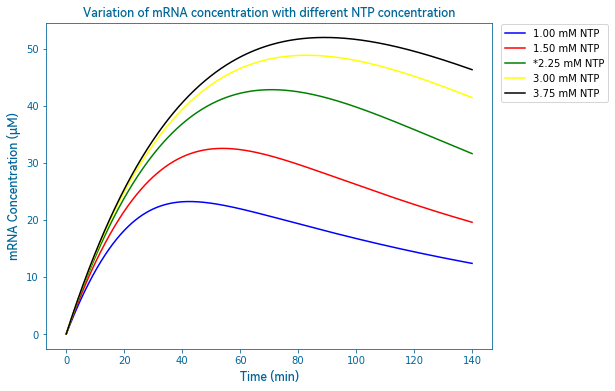

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_title('Variation of mRNA concentration with NTP concentration',fontsize = 12,FontProperties=text)
ax.plot(t,value1[:,0],'blue', label ='1.00 mM NTP')
ax.plot(t,value2[:,0],'red', label ='1.50 mM NTP')
ax.plot(t,value3[:,0],'green', label ='*2.25 mM NTP')
ax.plot(t,value4[:,0],'yellow', label ='3.00 mM NTP')
ax.plot(t,value5[:,0],'black', label ='3.75 mM NTP')
ax.set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 12)
ax.set_ylabel('mRNA Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 12)
ax.set_title ('Variation of mRNA concentration with different NTP concentration',font,FontProperties=text,fontsize = 12)
ax.tick_params(axis='both', colors = '#006699')
ax.spines['right'].set_color('#006699')
ax.spines['left'].set_color('#006699')
ax.spines['top'].set_color('#006699')
ax.spines['bottom'].set_color('#006699')
ax.ticklabel_format(useOffset=False)
plt.legend(prop={'size':10}, bbox_to_anchor=(1.27, 1.01))
plt.savefig("fig2.png",dpi=500, bbox_inches='tight')

In [182]:
initial_values_event1 = [
    0,
    0.4,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]
value1 = odeint(calculate_event,initial_values_event1,t)

initial_values_event2 = [
    0,
    0.6,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]
value2 = odeint(calculate_event,initial_values_event2,t)

initial_values_event3 = [
    0,
    0.87,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]
value3 = odeint(calculate_event,initial_values_event3,t)

initial_values_event4 = [
    0,
    1.0,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]
value4 = odeint(calculate_event,initial_values_event4,t)

initial_values_event5 = [
    0,
    1.2,
    2.25E3,
    2.25E3,
    2.25E3,
    2.25E3,
    0.0E3,
]
value5 = odeint(calculate_event,initial_values_event5,t)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[3.67264922e+03 1.69370125e+03 3.04920126e+02 2.38092711e+01
 1.15850280e-06 9.09027915e-07 5.67187879e-06 1.75243111e+01
 2.10044667e+02 1.19885126e-09 1.37599106e-06 2.50516363e-06
 1.34242097e+00 2.35196371e+02 3.97648036e+04]
[3.67264923e+03 1.69370124e+03 3.04920126e+02 2.38092710e+01
 1.16195593e-06 9.11849687e-07 5.79485254e-06 1.75243110e+01
 2.10044667e+02 1.20224727e-09 1.40585536e-06 2.54689572e-06
 1.34242097e+00 2.35196371e+02 3.97648036e+04]
[3.67264898e+03 1.69370146e+03 3.04920144e+02 2.38092723e+01
 3.65030989e-07 2.86459549e-07 1.82046543e-06 1.75243144e+01
 2.10044691e+02 3.77688630e-10 4.41652526e-07 8.00112778e-07
 1.34242087e+00 2.35196388e+02 3.97648036e+04]
[3.67264898e+03 1.69370146e+03 3.04920144e+02 2.38092723e+01
 3.71339555e-07 2.91410222e-07 1.85192721e-06 1.75243144e+01
 2.10044691e+02 3.84215948e-10 4.49285286e-07 8.13940547e-07
 1.34242087e+00 2.35196388e+02 3.97648036e+04]
[3.67264889e+03 1.69370154e+03 3.04920150e+02 2.38092727e+01
 7.30061976e-08 5.7

 2.60861723e+00 1.21380873e+02 3.98786191e+04]
[5.53963300e+03 2.67906033e+02 7.27500540e+01 7.35930189e+00
 3.02008799e+00 3.57482459e+00 2.94318229e+01 1.83774435e+00
 4.30428119e+01 2.07167774e-03 4.73384324e+00 1.67582716e+01
 2.62321303e+00 1.20707536e+02 3.98792925e+04]
[5.53963300e+03 2.67906032e+02 7.27500538e+01 7.35930188e+00
 3.02008799e+00 3.57482459e+00 2.94318229e+01 1.83774435e+00
 4.30428118e+01 2.07167774e-03 4.73384324e+00 1.67582716e+01
 2.62321303e+00 1.20707536e+02 3.98792925e+04]
[5.55016828e+03 2.60903146e+02 7.09831552e+01 7.20658439e+00
 3.01839421e+00 3.57961449e+00 2.95780515e+01 1.78630972e+00
 4.20695954e+01 2.06658562e-03 4.74833239e+00 1.69025606e+01
 2.63772549e+00 1.20045410e+02 3.98799546e+04]
[5.55016828e+03 2.60903146e+02 7.09831552e+01 7.20658439e+00
 3.01839421e+00 3.57961449e+00 2.95780515e+01 1.78630972e+00
 4.20695954e+01 2.06658562e-03 4.74833239e+00 1.69025606e+01
 2.63772549e+00 1.20045410e+02 3.98799546e+04]
[5.56048654e+03 2.54055422e+02 6.

<ipython-input-186-9382fbf32ad4>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 12)
<ipython-input-186-9382fbf32ad4>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('mRNA Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 12)
<ipython-input-186-9382fbf32ad4>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title ('Variation of mRNA concentration with T7 RNAP concentration',font,FontProperties=text,fontsize = 12)


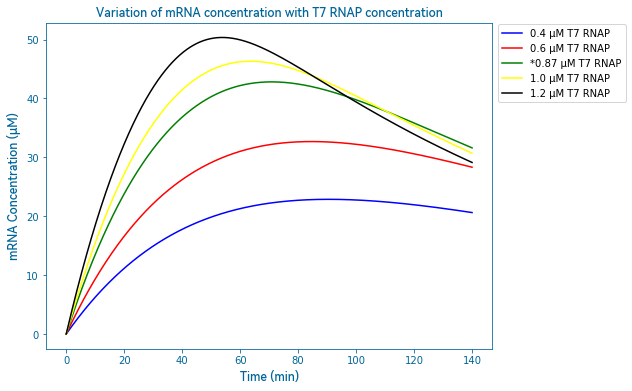

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(t,value1[:,0],'blue', label ='0.4 μM T7 RNAP')
ax.plot(t,value2[:,0],'red', label ='0.6 μM T7 RNAP')
ax.plot(t,value3[:,0],'green', label ='*0.87 μM T7 RNAP')
ax.plot(t,value4[:,0],'yellow', label ='1.0 μM T7 RNAP')
ax.plot(t,value5[:,0],'black', label ='1.2 μM T7 RNAP')
ax.set_xlabel('Time (min)',font,labelpad = 5,FontProperties=text,fontsize = 12)
ax.set_ylabel('mRNA Concentration (μM)',font,labelpad = 5,FontProperties=text,fontsize = 12)
ax.set_title ('Variation of mRNA concentration with T7 RNAP concentration',font,FontProperties=text,fontsize = 12)
ax.tick_params(axis='both', colors = '#006699')
ax.spines['right'].set_color('#006699')
ax.spines['left'].set_color('#006699')
ax.spines['top'].set_color('#006699')
ax.spines['bottom'].set_color('#006699')
ax.ticklabel_format(useOffset=False)
plt.legend(prop={'size':10}, bbox_to_anchor=(1.31, 1.01))
plt.savefig("fig3.png",dpi=500, bbox_inches='tight')